In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables) 


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'The comparisons of data mining techniques for the predictive accuracy of probability of default of cre

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
y.head(5)

,Y
0,1
1,1
2,0
3,0
4,0


In [6]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [7]:
X.value_counts()

X1       X2  X3  X4  X5  X6  X7  X8  X9  X10  X11  X12     X13     X14     X15     X16     X17     X18    X19    X20     X21    X22    X23  
360000   2   1   2   27   1  -2  -2  -2  -2   -2   0       0       0       0       0       0       0      0      0       0      0      0        3
200000   2   1   1   34   1  -2  -2  -2  -2   -2   0       0       0       0       0       0       0      0      0       0      0      0        3
210000   2   2   1   49   1  -2  -2  -2  -2   -2   0       0       0       0       0       0       0      0      0       0      0      0        3
20000    1   2   2   24   2   2   4   4   4    4   1650    1650    1650    1650    1650    1650    0      0      0       0      0      0        3
370000   1   1   1   40   1  -2  -2  -2  -2   -2   0       0       0       0       0       0       0      0      0       0      0      0        2
                                                                                                                                 

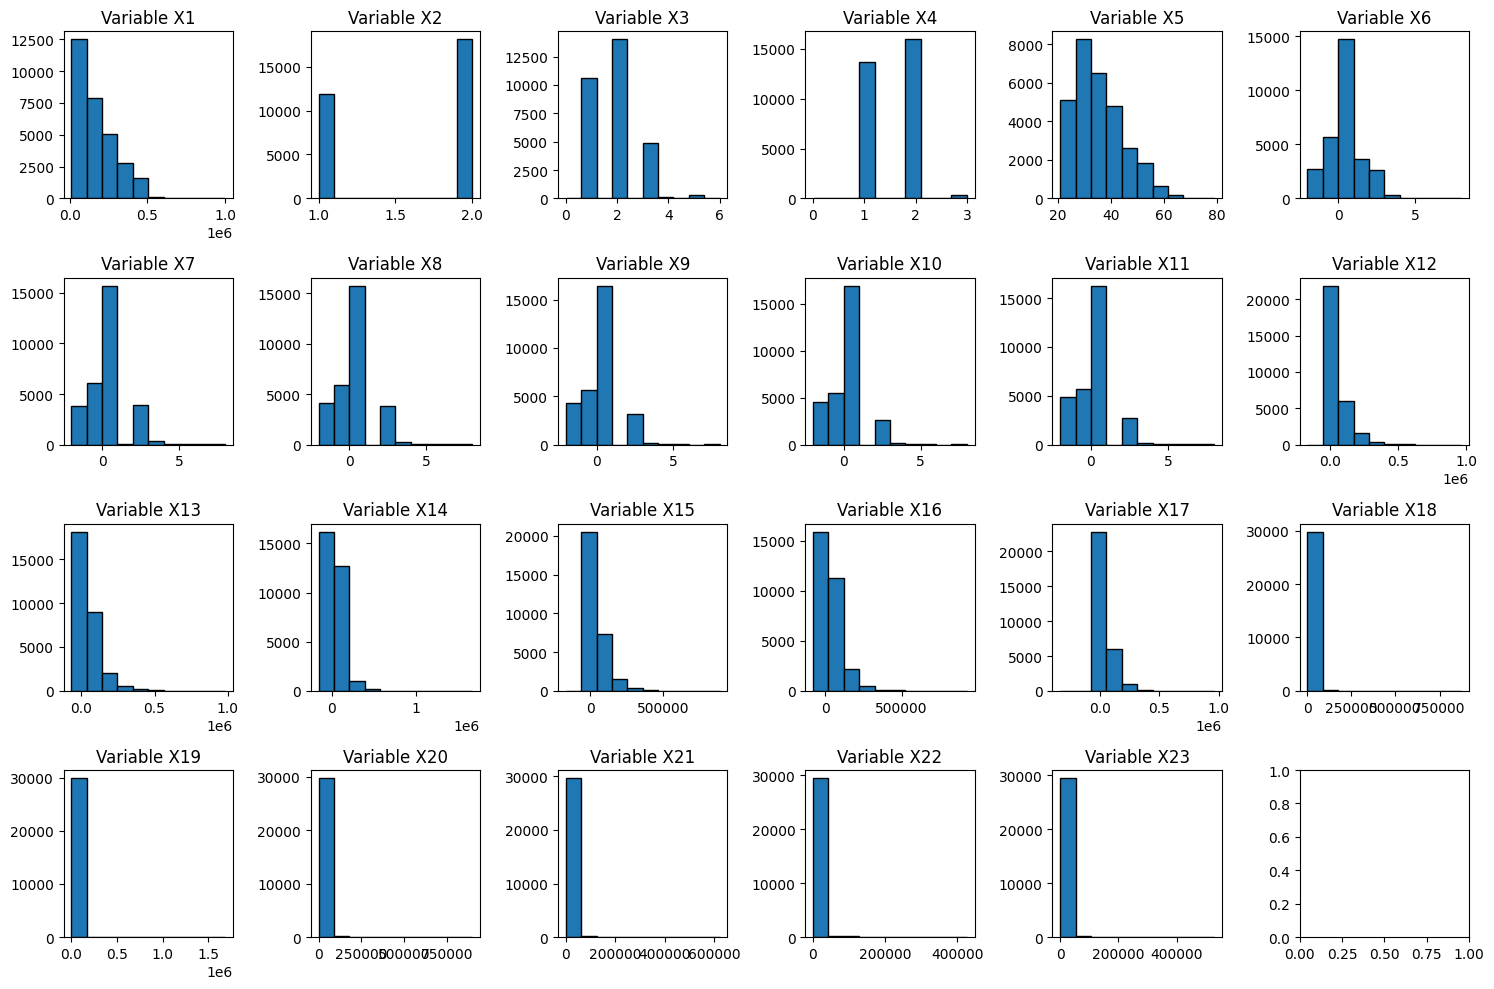

In [8]:
columnas = X.columns[0:]

# Crea subplots para cada histograma
n_filas, n_columnas = 4, 6
fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15, 10))
axs = axs.ravel()

# Genera histogramas para cada columna
for i, col in enumerate(columnas):
    axs[i].hist(X[col], bins=10, edgecolor='black')
    axs[i].set_title(f'Variable X{i+1}')

plt.tight_layout()
plt.show()


En esta investigación se empleó una variable binaria, el pago por defecto (Sí = 1, No = 0), como variable de respuesta. En este estudio se revisó la literatura y se utilizaron como variables explicativas las siguientes 23 variables:
X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito individual al consumo como su crédito familiar (complementario).
X2: Género (1 = hombre; 2 = mujer).
X3: Educación (1 = escuela de posgrado; 2 = universidad; 3 = escuela secundaria; 4 = otros).
X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
X5: Edad (año).
X6 - X11: Historial de pagos anteriores. Realizamos un seguimiento de los registros de pagos mensuales anteriores (de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de reembolso en septiembre de 2005; X7 = el estado de reembolso en agosto de 2005; . . .; X11 = el estado de reembolso en abril de 2005. La escala de medición para el estado de reembolso es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago durante ocho meses; 9 = retraso en el pago durante nueve meses o más.
X12-X17: Monto del estado de cuenta (NT dollar). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = importe del estado de cuenta en abril de 2005. 
X18-X23: Monto del pago anterior (dólar NT). X18 = importe pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .; X23 = monto pagado en abril de 2005. 

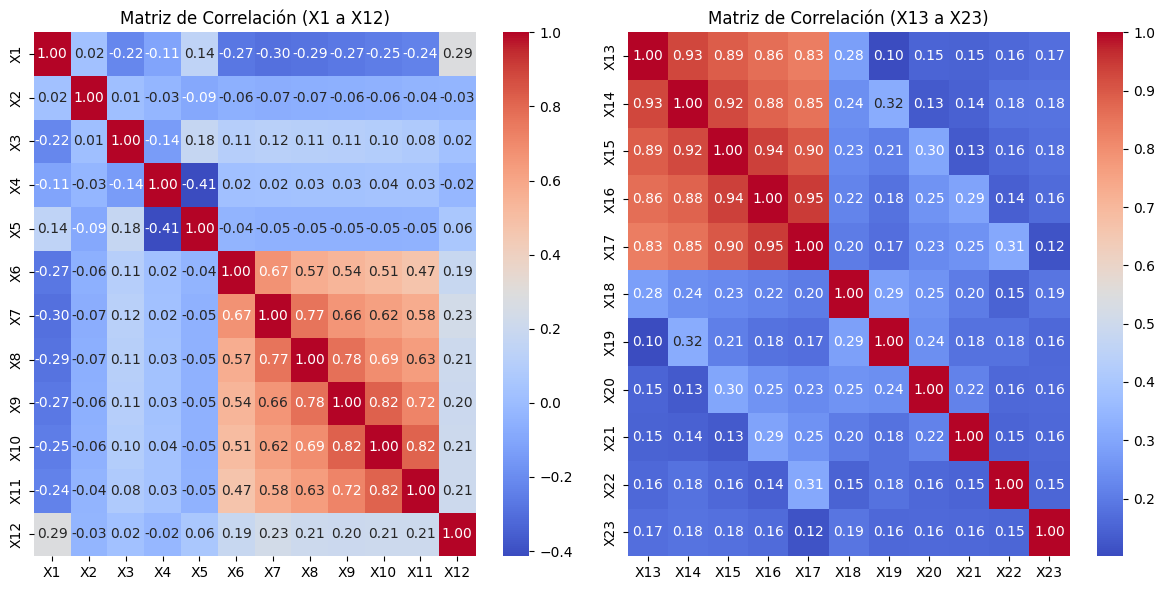

In [9]:
import seaborn as sns

# Supongamos que 'df' es tu DataFrame con todas las variables.
# Asegúrate de que solo incluya las columnas numéricas relevantes.

# Divide las variables en dos grupos
variables_x1_to_x12 = X.iloc[:, 0:12]
variables_x13_to_x23 = X.iloc[:, 12:]

# Calcula las matrices de correlación para cada grupo
correlation_matrix_x1_to_x12 = variables_x1_to_x12.corr()
correlation_matrix_x13_to_x23 = variables_x13_to_x23.corr()

# Crea los mapas de calor (heatmaps)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_x1_to_x12, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación (X1 a X12)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_x13_to_x23, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación (X13 a X23)')

plt.tight_layout()
plt.show()


In [10]:
# Calcula la matriz de covarianza
cov_matrix = np.cov(X, rowvar=False)

# Calcula los valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Calcula los porcentajes de varianza explicada
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Imprime los resultados
for i, ev in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ev:.2f} (Varianza explicada: {ev*100:.2f}%)")


Componente 1: 0.61 (Varianza explicada: 61.04%)
Componente 2: 0.30 (Varianza explicada: 29.54%)
Componente 3: 0.03 (Varianza explicada: 3.05%)
Componente 4: 0.02 (Varianza explicada: 1.69%)
Componente 5: 0.01 (Varianza explicada: 0.94%)
Componente 6: 0.01 (Varianza explicada: 0.90%)
Componente 7: 0.01 (Varianza explicada: 0.75%)
Componente 8: 0.01 (Varianza explicada: 0.58%)
Componente 9: 0.01 (Varianza explicada: 0.64%)
Componente 10: 0.00 (Varianza explicada: 0.30%)
Componente 11: 0.00 (Varianza explicada: 0.24%)
Componente 12: 0.00 (Varianza explicada: 0.15%)
Componente 13: 0.00 (Varianza explicada: 0.17%)
Componente 14: 0.00 (Varianza explicada: 0.00%)
Componente 15: 0.00 (Varianza explicada: 0.00%)
Componente 16: 0.00 (Varianza explicada: 0.00%)
Componente 17: 0.00 (Varianza explicada: 0.00%)
Componente 18: 0.00 (Varianza explicada: 0.00%)
Componente 19: 0.00 (Varianza explicada: 0.00%)
Componente 20: 0.00 (Varianza explicada: 0.00%)
Componente 21: 0.00 (Varianza explicada: 0.00%)

Se pasa a normalizar los datos y a aplicar PCA

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled)

# Renombra las columnas de X1 a X23
X_scaled.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                     'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

# Mis variables en dos grupos
variables_x6_to_x11 = X_scaled.iloc[:, 5:11]
variables_x13_to_x17 = X_scaled.iloc[:, 12:17]

pipeline_x6_x11 = Pipeline([
    ('pca', PCA(n_components=1))
])

pipeline_x13_x17 = Pipeline([
    ('pca', PCA(n_components=1))
])

pipeline_x6_x11.fit(variables_x6_to_x11)
pipeline_x13_x17.fit(variables_x13_to_x17)

x6_11_pca = pipeline_x6_x11.transform(variables_x6_to_x11)
x13_17_pca = pipeline_x13_x17.transform(variables_x13_to_x17)

X_scaled['X6-11'] = x6_11_pca
X_scaled['X13-17'] = x13_17_pca

# Elimina las columnas originales que se combinaron en PCA
columns_to_drop = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X13', 'X14', 'X15', 'X16', 'X17']
X_scaled.drop(columns=columns_to_drop, inplace=True)


X_scaled.head()

,X1,X2,X3,X4,X5,X12,X18,X19,X20,X21,X22,X23,X6-11,X13-17
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.642501,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.477471,-1.477572
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.659219,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.461637,-1.400224
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.298560,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0.393314,-0.999227
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.057491,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0.393314,-0.250322
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.578618,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.273290,-0.802615


In [12]:
print(X_scaled.shape)
print(y.shape)


(30000, 14)
(30000, 1)


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Cambiar la forma de y a un arreglo unidimensional
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

print(f"Ejemplos usados para entrenar: {len(X_train)} {len(y_train)}")
print(f"Ejemplos usados para validación: {len(X_val)} {len(y_val)}")
print(f"Ejemplos usados para prueba: {len(X_test)} {len(y_test)}")

Ejemplos usados para entrenar: 16800 16800
Ejemplos usados para validación: 4200 4200
Ejemplos usados para prueba: 9000 9000


[LightGBM] [Info] Number of positive: 3760, number of negative: 13040
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223810 -> initscore=-1.243603
[LightGBM] [Info] Start training from score -1.243603


/home/wonder/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3760, number of negative: 13040
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222857 -> initscore=-1.249093
[LightGBM] [Info] Start training from score -1.249093
[LightGBM] [Info] Number of positive: 3760, number of negative: 13040
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218988 -> initscore=-1.271573
[LightGBM] [Info] Start training from score -1.271573
[LightGBM] [In

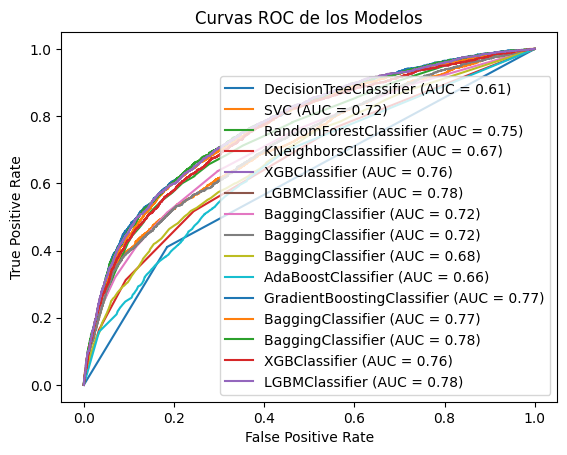

DecisionTree - Validation - Accuracy: 0.72, Precision: 0.37, Recall: 0.42, F1-Score: 0.39, ROC AUC: 0.61
DecisionTree - Test - Accuracy: 0.73, Precision: 0.38, Recall: 0.41, F1-Score: 0.40, ROC AUC: 0.61
SVM - Validation - Accuracy: 0.81, Precision: 0.66, Recall: 0.25, F1-Score: 0.36, ROC AUC: 0.73
SVM - Test - Accuracy: 0.80, Precision: 0.62, Recall: 0.22, F1-Score: 0.32, ROC AUC: 0.72
RandomForest - Validation - Accuracy: 0.81, Precision: 0.62, Recall: 0.36, F1-Score: 0.45, ROC AUC: 0.75
RandomForest - Test - Accuracy: 0.80, Precision: 0.58, Recall: 0.33, F1-Score: 0.42, ROC AUC: 0.75
KNN - Validation - Accuracy: 0.78, Precision: 0.51, Recall: 0.33, F1-Score: 0.40, ROC AUC: 0.69
KNN - Test - Accuracy: 0.78, Precision: 0.48, Recall: 0.31, F1-Score: 0.38, ROC AUC: 0.67
XGBoost - Validation - Accuracy: 0.81, Precision: 0.61, Recall: 0.38, F1-Score: 0.47, ROC AUC: 0.76
XGBoost - Test - Accuracy: 0.81, Precision: 0.59, Recall: 0.36, F1-Score: 0.45, ROC AUC: 0.76
LightGBM - Validation - Ac

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Modelos base
models = {
    'DecisionTree': DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=42),
    'SVM': SVC(probability=True, C=1.0,  kernel="rbf", random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# bagging y Boosting
bagging_models = {
    'Bagging_DecisionTree': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
    'Bagging_SVM': BaggingClassifier(estimator=SVC(probability=True), random_state=42),
    'Bagging_KNN': BaggingClassifier(estimator=KNeighborsClassifier(),random_state=True)
}

boosting_models = {
    'adaBoost_DecsionTree': AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Función para evaluar el modelo
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test):
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_proba_val = model.predict_proba(X_val)[:, 1]
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    results_val = {
        'accuracy': accuracy_score(y_val, y_pred_val),
        'precision': precision_score(y_val, y_pred_val),
        'recall': recall_score(y_val, y_pred_val),
        'f1': f1_score(y_val, y_pred_val),
        'roc_auc': roc_auc_score(y_val, y_proba_val)
    }
    
    results_test = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'f1': f1_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_proba_test)
    }

    fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {results_test["roc_auc"]:.2f})')

    return results_val, results_test

# Almacenar los resultados
results = {}

# Evaluar los modelos base
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)

# Evaluar bagging models
for name, model in bagging_models.items():
    results[name] = evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)

# Evaluar boosting models
for name, model in boosting_models.items():
    results[name] = evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test)

# Evaluar XGBoost y LightGBM con bagging y boosting
results['Bagging_XGBoost'] = evaluate_model(BaggingClassifier(estimator=xgb.XGBClassifier(), random_state=42), X_train, X_val, X_test, y_train, y_val, y_test)
results['Bagging_LightGBM'] = evaluate_model(BaggingClassifier(estimator=lgb.LGBMClassifier(), random_state=42), X_train, X_val, X_test, y_train, y_val, y_test)
results['Boosting_XGBoost'] = evaluate_model(xgb.XGBClassifier(), X_train, X_val, X_test, y_train, y_val, y_test)
results['Boosting_LightGBM'] = evaluate_model(lgb.LGBMClassifier(), X_train, X_val, X_test, y_train, y_val, y_test)

# Mostrar los resultados
plt.title('Curvas ROC de los Modelos')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Imprimir resultados
for model_name, (metrics_val, metrics_test) in results.items():
    print(f'{model_name} - Validation - Accuracy: {metrics_val["accuracy"]:.2f}, Precision: {metrics_val["precision"]:.2f}, Recall: {metrics_val["recall"]:.2f}, F1-Score: {metrics_val["f1"]:.2f}, ROC AUC: {metrics_val["roc_auc"]:.2f}')
    print(f'{model_name} - Test - Accuracy: {metrics_test["accuracy"]:.2f}, Precision: {metrics_test["precision"]:.2f}, Recall: {metrics_test["recall"]:.2f}, F1-Score: {metrics_test["f1"]:.2f}, ROC AUC: {metrics_test["roc_auc"]:.2f}')


Los modelos LightGBM, GradientBoosting, y Boosting_LightGBM han mostrado la mejor precisión (accuracy) y una buena combinación de precisión (precision), recuperación (recall), y puntuación F1 (F1-Score) en el conjunto de prueba

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   1.7

({'accuracy': 0.8214285714285714,
  'precision': 0.6487455197132617,
  'recall': 0.3951965065502183,
  'f1': 0.49118046132971505,
  'roc_auc': 0.775265911472323},
 {'accuracy': 0.8152222222222222,
  'precision': 0.6322350845948352,
  'recall': 0.3622448979591837,
  'f1': 0.4605903340901719,
  'roc_auc': 0.7736761146219852})

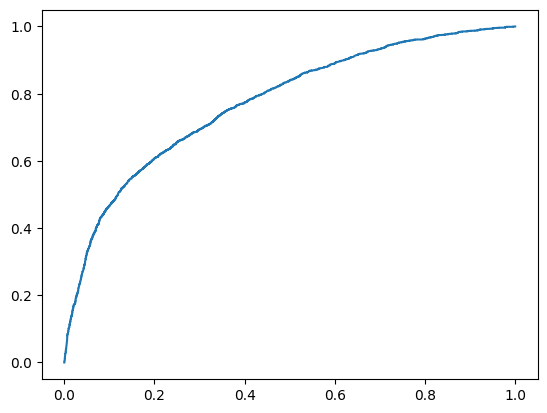

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Definir el rango de hiperparámetros para buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Crear el modelo base
gb = GradientBoostingClassifier(random_state=42)

# Crear el grid search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el grid search a los datos
grid_search.fit(X_train, y_train.ravel())

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el mejor modelo en los conjuntos de validación y prueba
best_gb = grid_search.best_estimator_
evaluate_model(best_gb, X_train, X_val, X_test, y_train, y_val, y_test)


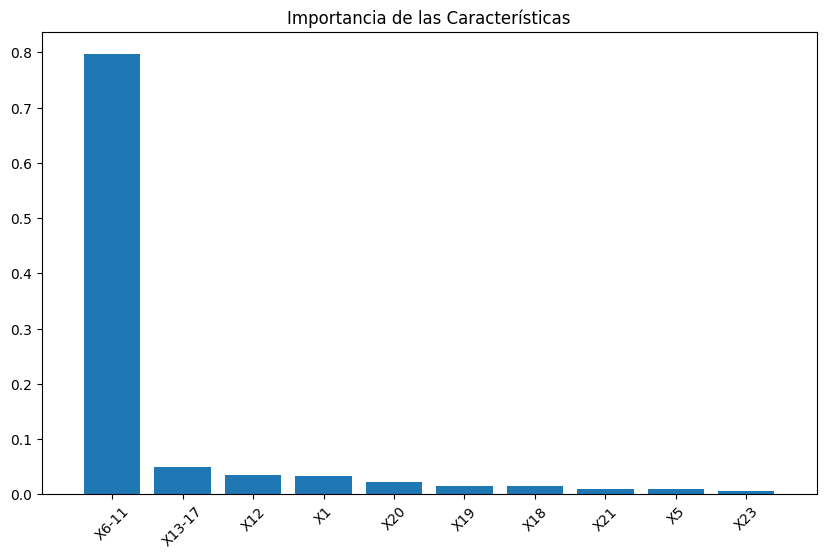

In [17]:
import matplotlib.pyplot as plt

# Importancia de las características
importances = best_gb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Plotear las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.xlim([-1, 10])
plt.show()


In [18]:
import joblib

# Guardar el modelo
joblib.dump(best_gb, 'best_gradient_boosting_model.pkl')

# Cargar el modelo
# best_gb = joblib.load('best_gradient_boosting_model.pkl')


['best_gradient_boosting_model.pkl']